In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New Packages
from datetime import datetime
from dateutil import parser

In [51]:
import pandas_datareader as pdr

In [52]:
data = pdr.DataReader('DEXUSEU', 'fred')

### Wieviel Daten sind in diesem Datensatz enthalten?

In [53]:
data.shape

(1301, 1)

### Plotte Zeitreihe

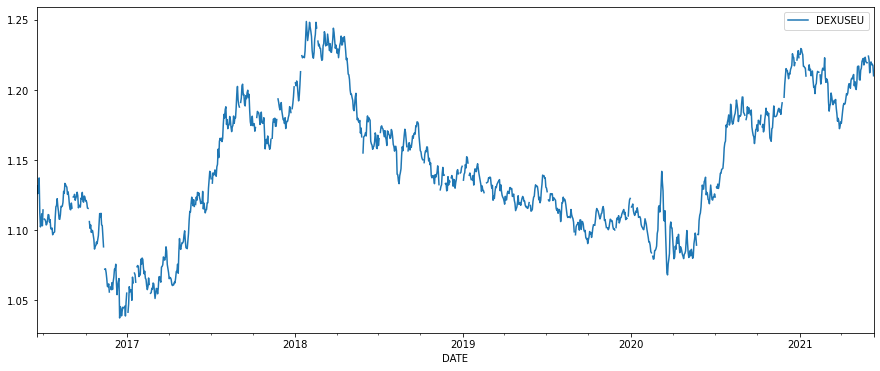

In [54]:
data.plot(figsize=(15, 6));

### Beschreibe den Plot. Sind Ungereimtheiten erkennbar?

In [55]:
# Anstieg, Abfall, Max, Min
# Es sind Lücken erkennbar

### Bestätige Deine Eindrück per deskriptiver Statistik

In [56]:
data.describe()

,DEXUSEU
count,1243.000000
mean,1.143885
std,0.048108
min,1.037500
25%,1.109150
50%,1.135700
75%,1.181050
max,1.248800


### Versuche den Mittelwert, Min/Max, 25%, 50% und 75% sinnvoll in dem obigen Plot zu visualisieren.

In [57]:
data.columns

Index(['DEXUSEU'], dtype='object')

In [58]:
# min am 15.12.2016
data[data.DEXUSEU == data.DEXUSEU.min()].sort_values('DEXUSEU')

,DEXUSEU
DATE,
2016-12-15,1.0375


In [59]:
# max am 25.01.2018
data[data.DEXUSEU == data.DEXUSEU.max()].sort_values('DEXUSEU')

,DEXUSEU
DATE,
2018-01-25,1.2488


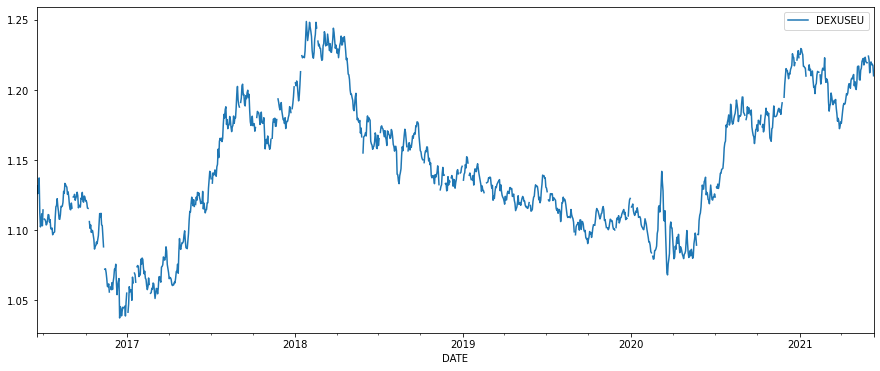

In [60]:
data.plot(figsize=(15, 6));


In [61]:
data_2016_2019 = data.loc['2016': '2019']

In [62]:
data.index[0]

Timestamp('2016-06-17 00:00:00')

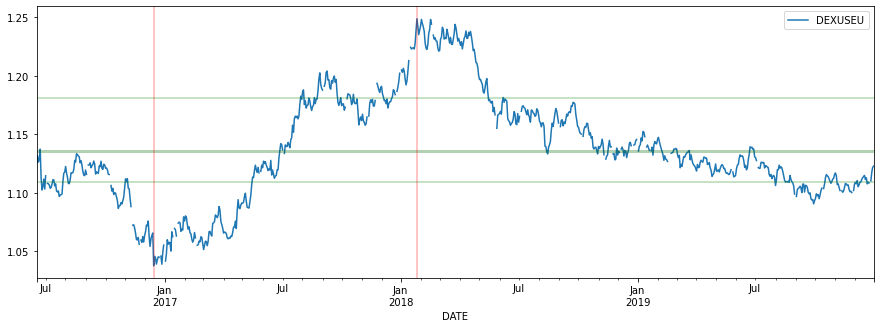

In [63]:
data_2016_2019.plot(figsize = (15, 5))
plt.axhline(y = 1.109175, alpha=0.3, color='green')
plt.axhline(y = 1.135700, alpha=0.3, color='darkgreen', linewidth = 3)
plt.axhline(y = 1.181025, alpha=0.3, color='green')
plt.axvline('15.12.2016', alpha=0.3, color='red')
plt.axvline('25.01.2018', alpha=0.3, color='red');

Nehme den Abschnitt im Jahre 2016. Hier sind ja einige Lücken zu sehen. Versuch diese vorwärts und 

In [73]:
data_2016 = data.loc['2016']

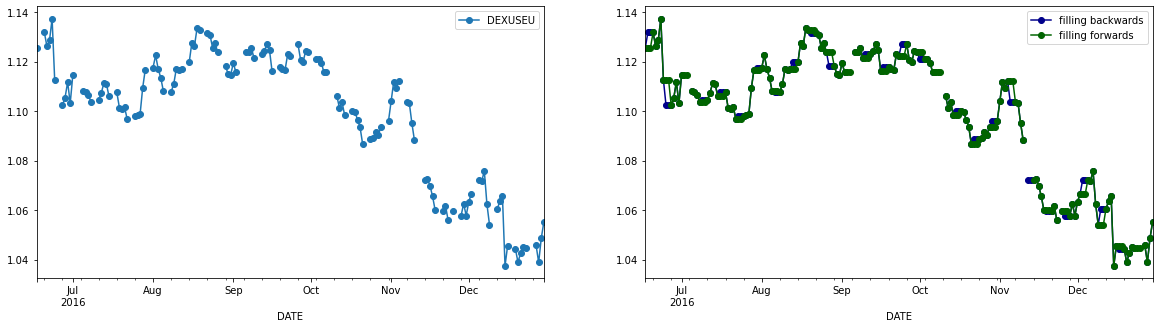

In [74]:
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (20, 5))
#data = data_2016
data_2016.asfreq('D').plot(ax=ax[0], marker = 'o')
data_2016.asfreq('D', method = 'bfill').plot(ax=ax[1], style = '-o', color = 'darkblue')   # filling backwards: method = 'bfill'
data_2016.asfreq('D', method ='ffill').plot(ax=ax[1], style = '-o', color = 'darkgreen')   # filling forwards: method = 'ffil'
ax[1].legend(["filling backwards", "filling forwards"]);

In [75]:
data.shape

(1301, 1)

In [76]:
data_2016.shape

(141, 1)

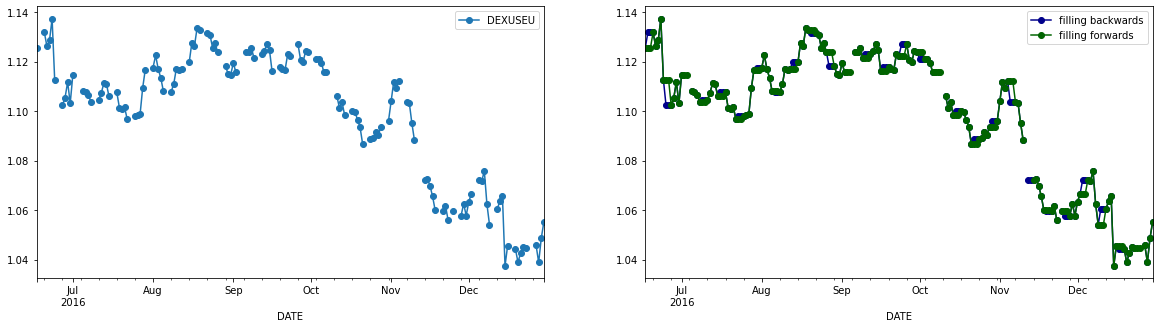

In [77]:
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (20, 5))
#data = data_2016
data_2016.asfreq('D').plot(ax=ax[0], marker = 'o')
data_2016.asfreq('D', method = 'bfill', fill_value = True).plot(ax=ax[1], style = '-o', color = 'darkblue')   # filling backwards: method = 'bfill'
data_2016.asfreq('D', method ='ffill', fill_value = True).plot(ax=ax[1], style = '-o', color = 'darkgreen')   # filling forwards: method = 'ffil'
ax[1].legend(["filling backwards", "filling forwards"]);

### Nach einmaliger Durchführung sind noch nicht alle Lücken geschlossen. Findest Ihr ein Weg alle zu schließen?
Hinweis: ist advanced... Daher evtl. überspringen

...oder doch nicht so schwer? :-)

Vielleicht hilfts: https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3


In [160]:
data_ffill = data.ffill()
data_bfill = data.bfill()

In [162]:
data_bfill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1301 entries, 2016-06-17 to 2021-06-11
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXUSEU  1301 non-null   float64
dtypes: float64(1)
memory usage: 52.6 KB


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1301 entries, 2016-06-17 to 2021-06-11
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXUSEU  1243 non-null   float64
dtypes: float64(1)
memory usage: 52.6 KB


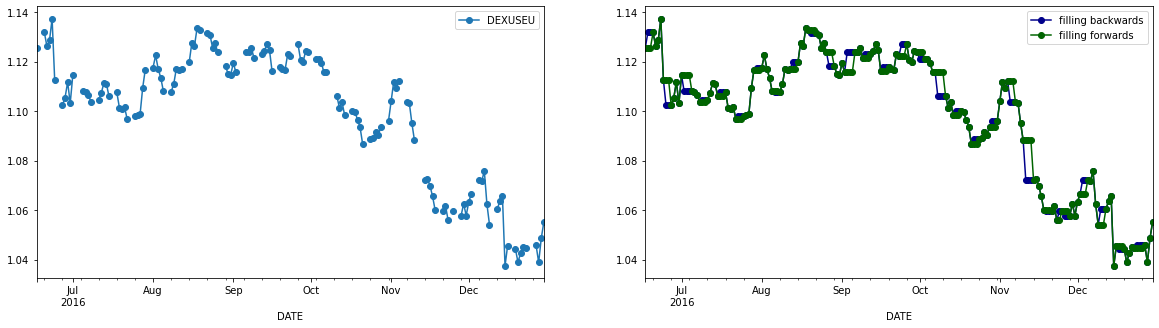

In [165]:
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (20, 5))
#data = data_2016
data_2016.asfreq('D').plot(ax=ax[0], marker = 'o')
data_bfill.loc['2016'].asfreq('D', method = 'bfill', fill_value = True).plot(ax=ax[1], style = '-o', color = 'darkblue')   # filling backwards: method = 'bfill'
data_ffill.loc['2016'].asfreq('D', method = 'ffill', fill_value = True).plot(ax=ax[1], style = '-o', color = 'darkgreen')   # filling forwards: method = 'ffil'
ax[1].legend(["filling backwards", "filling forwards"]);

### Führe ein wöchentliches und ein monatliches Resampling mit den Daten 2017 durch. Versuche alles in einem Plot zu visualisieren.

In [78]:
data_2017 = data.loc['2017']

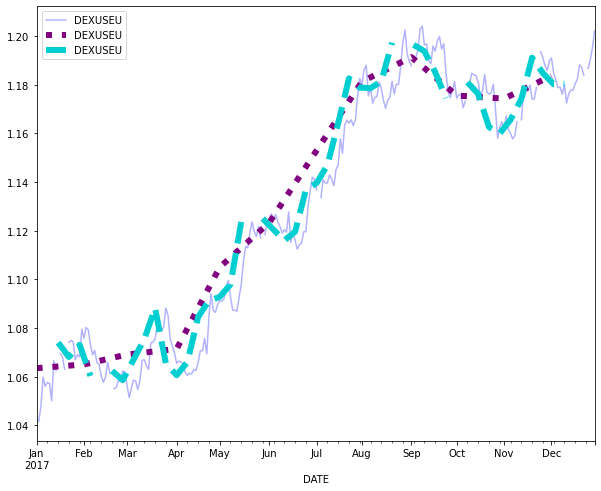

In [97]:
fig, ax = plt.subplots(1)
data_2017.plot(alpha = 0.3, style = '-', color = 'blue', figsize = (10, 8), ax = ax)
data_2017.resample('M').mean().plot(style= ':', color = 'purple', label = 'Mean last year', linewidth = 6, ax = ax)            # BA End of Business Year
data_2017.asfreq('W', method ='bfill').plot(style = '--', color = 'darkturquoise', label = 'Value beginning of the year', linewidth = 6, ax = ax )
plt.legend();

<AxesSubplot:xlabel='DATE'>

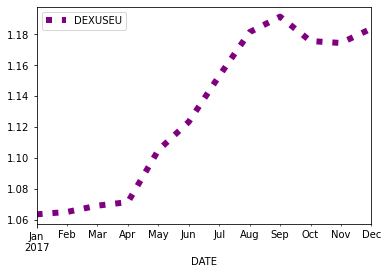

In [83]:
data_2017.resample('M').mean().plot(style= ':', color = 'purple', label = 'Mean last year', linewidth = 6)

In [81]:
data_2017.shape

(260, 1)

<AxesSubplot:xlabel='DATE'>

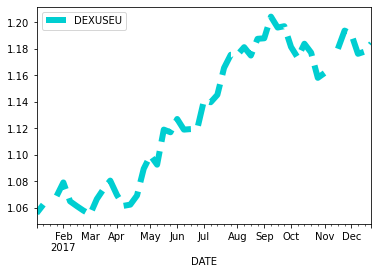

In [89]:
data_2017.asfreq('W', method ='ffill').plot(style = '--', color = 'darkturquoise', label = 'Value beginning of the year', linewidth = 6 )

### Versuche die Daten zu glätten.

Hinweis: Klappt es gleich? Dann ist alles ok. Falls nicht, versuche zu testen, welchen Datentyp Deine Daten haben und welcher Datentyp bei der Intro des Themas verwendet wurde.

In [117]:
data.columns

Index(['DEXUSEU'], dtype='object')

In [134]:
data_2 = data['DEXUSEU']
data_2.head()

DATE
2016-06-17    1.1256
2016-06-20    1.1318
2016-06-21    1.1262
2016-06-22    1.1286
2016-06-23    1.1373
Name: DEXUSEU, dtype: float64

In [146]:
rolling = data_2.rolling(15, center=True)

In [148]:
pd.DataFrame({'input': data_2,'Annual Mean Value': rolling.mean(), 'Standard Deviation': rolling.std()}).tail()

,input,Annual Mean Value,Standard Deviation
DATE,,,
2021-06-07,1.2200,NaN,NaN
2021-06-08,1.2180,NaN,NaN
2021-06-09,1.2184,NaN,NaN
2021-06-10,1.2173,NaN,NaN
2021-06-11,1.2101,NaN,NaN


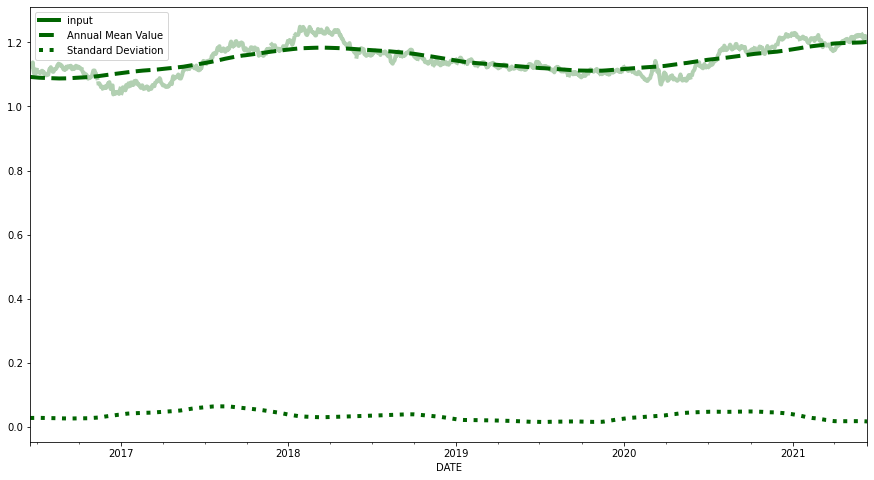

In [156]:
# annual mean value and standard deviation
rolling = data_2.rolling(360, min_periods = 80, center=True)                                    # min_periods notwendig!
data_roll = pd.DataFrame({'input': data_2,'Annual Mean Value': rolling.mean(), 'Standard Deviation': rolling.std()})
ax = data_roll.plot(style=['-', '--', ':'], color = 'darkgreen', figsize = (15, 8), linewidth = 4)
ax.lines[0].set_alpha(0.3)

### Lade Dir nun eigene Daten von FRED Economic Data herunter und probieren ebenfalls diese zu plotten, zu glätten und zu resampeln

https://fred.stlouisfed.org/categories

In [100]:
# 
data_2 = pdr.DataReader('PSUNOUSDM', 'fred')

In [101]:
data_2.head()

,PSUNOUSDM
DATE,
2016-07-01,975.105258
2016-08-01,981.942301
2016-09-01,989.050000
2016-10-01,998.407143
2016-11-01,1000.485208


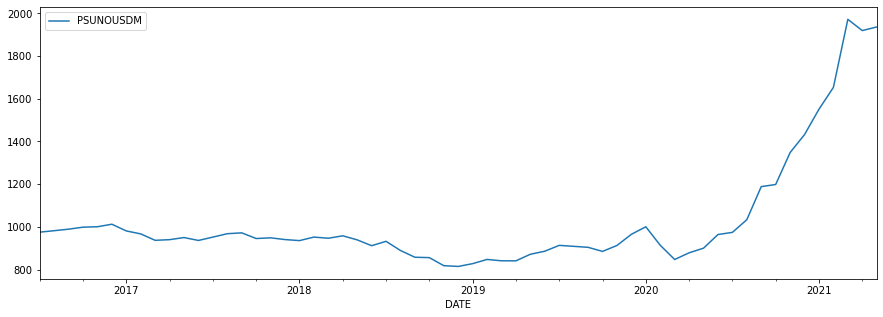

In [103]:
data_2.plot(figsize = (15,5));